# Cooperativa Fondesurco: Energy Access in Peru 

Energy access is multidimensional. In order to quantify and address energy demand and energy needs of the rural population, it is highly necessary to implement tools that are not limited to a purely binary assessment (household connected/not connected to the grid). Assessing energy needs shall take into account a wider range of attributes, measuring energy access in terms of affordability, reliability, quality, and safety of energy, as well as include the possibility of using modern and alternative sources (e.g., solar home systems, mini-grids).
The purpose of this study was to assess energy access of 137 households in the region of Arequipa (Peru). 
The approach implemented is based on the Multi-Tier Framework (MTF), developed by The World Bank.

The objective of this project is to analyze the access to energy of a sample of clients of the microfinance institution 
Cooperativa Fondesurco with the [HEDERA Impact Toolkit](https://hit.hedera.online) for [energy access assessment](https://hit.hedera.online/sdg7.html). 
Relevant information concerning the use, associated costs and several attributes describing access to electricity and cooking solutions has been collected the customers of the financial institution in rural and remote areas
using the App HEDERA collect.

The sample - and the evaluation of the energy access attributes - allows also to evaluate a baseline with respect to 
[SDG7](https://sustainabledevelopment.un.org/sdg7):
**Affordable, reliable, and safe energy for all**.
The baseline evaluation is based on standard metrics, implementing the
[Multi-Tier Framework (MTF)](https://www.esmap.org/node/55526) developed 
by the ESMAP sector of The World Bank. The case study is also a pioneer application of the 
[Progress out of Energy Poverty Index (PEPI)](https://depositonce.tu-berlin.de/handle/11303/6708),
which is also based on the MTF.


## Methodology

Household data can be efficiently collected using the mobile survey integrated in HEDERA collect. The survey optimizes the ESMAP Energy Survey based on the Multi-tier framework, and can be efficiently completed in less than 15 minutes. 

HEDERA offers two approaches for data collection

* **In Person** (the App is used by loan officers during household visits)

* **Combination of in person and telephon interview** (the App is used by both loan officers, for example to record GPS, and by employees interviewing the clients by telephone)


In both cases, collected client data can be integrated into exiting databases available at the institution, in order to perform analysis including demographic, social, and credit historical data

In [3]:
import os,sys, folium, pandas
HIT_PATH = '../../../HIT/src/' # local path to HIT src code
sys.path.insert(0, os.path.normpath(os.path.join(os.path.abspath(''), HIT_PATH)))
import hedera_types as hedera
import odk_interface as odk
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm
fontpath = '/Library/Fonts/JosefinSans-Regular.ttf'
fm.fontManager.addfont(fontpath)
prop = fm.FontProperties(fname=fontpath)

# change plot layout
plt.rcParams["font.family"] = prop.get_name()
plt.rcParams.update({'font.size': 20})

# load institution data
mfi = hedera.mfi(2)
odk_data_dir = '../../../ODK_Collect_Data/Fondesurco/'
odk_survey_folder = ['FONDESURCO_1/','FONDESURCO_2/']
odk_data_name = [odk_data_dir + odk_survey_folder[0] + 'PEPI_results.csv',
                 odk_data_dir + odk_survey_folder[1] + 
                 'PEPI_FONDESURCO_2_results.csv']
mfi.gpsFile = '../../../HIT-2019/_datasets/Fondesurco/HederaGPS/All.txt'
mfi.data_client_file = '../../../HIT-2019/_datasets/Fondesurco/ClientDatabases/data_with_GPS_3.csv'
data = mfi.read_survey(odk_data_name, delimiter=":")
mfi.HH = odk.households(data)
collection_overview = odk.overview(mfi.HH,mfi)

## Collection overview

### Map
The Map allows to visualize the location of the collected GPS data. Missing data points are displayed with coordinated *(0,0)*

In [2]:

#Define initial geolocation
initial_location = [-15.6, -71.66]
map_osm = folium.Map(initial_location, zoom_start=8,tiles='Stamen Terrain')
colors = {0: hedera.tier_color(0), 1 : hedera.tier_color(1), 2 : hedera.tier_color(2), 
          3 : hedera.tier_color(3), 4 : hedera.tier_color(4), 5: hedera.tier_color(5)}
mfi.HH.apply(lambda row:folium.CircleMarker(location=[row["GPS_Latitude"], row["GPS_Longitude"]],
                                        radius=10,fill_color=colors[row['E_Index']], 
                                        popup=' MTF Index: ' + str(row['E_Index'])).add_to(map_osm), axis=1)
map_osm

### Data per location
Data have been collected in five different locations.

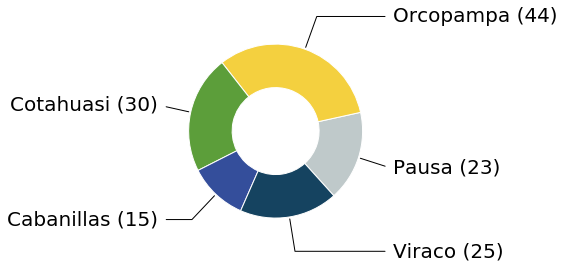

In [3]:
plt.rcParams["font.family"] = prop.get_name()
plt.rcParams.update({'font.size': 20})
mfi.plot_collection_overview()


## Access to Electricity

### Attributes 

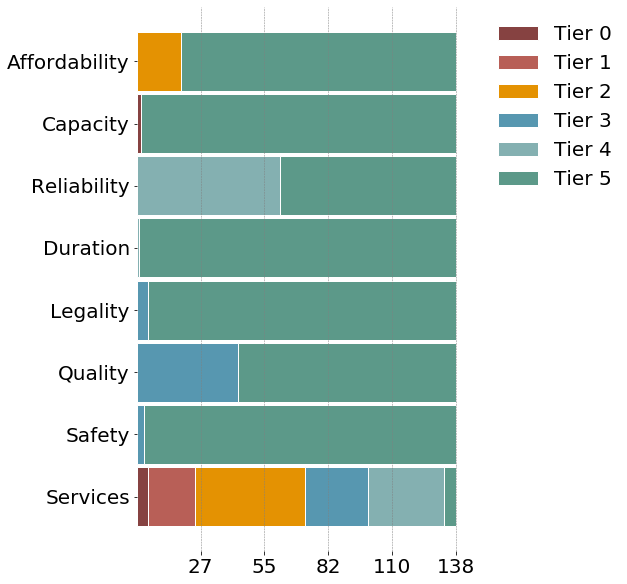

In [4]:
plt.rcParams["font.family"] = prop.get_name()
plt.rcParams.update({'font.size': 20})
mfi.tier_barh(hedera.keys().attributes_electricity[0:8],
              hedera.names('en').e_attributes[0:8],legend=True)


### MTF Index (Access to electricity)

The MTF Index is given, for each household, by the minimum ranking among all considered attributes.

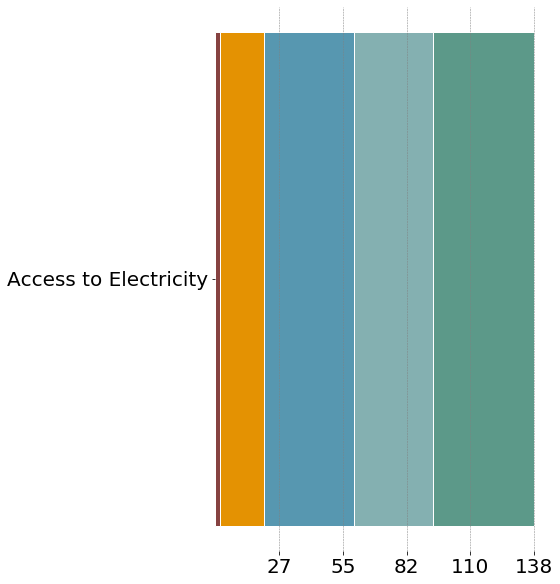

In [5]:
plt.rcParams["font.family"] = prop.get_name()
plt.rcParams.update({'font.size': 20})
mfi.tier_barh(['E_Index'],['Access to Electricity'])


## Power Sources
### Primary Sources of Electricity and Illumination

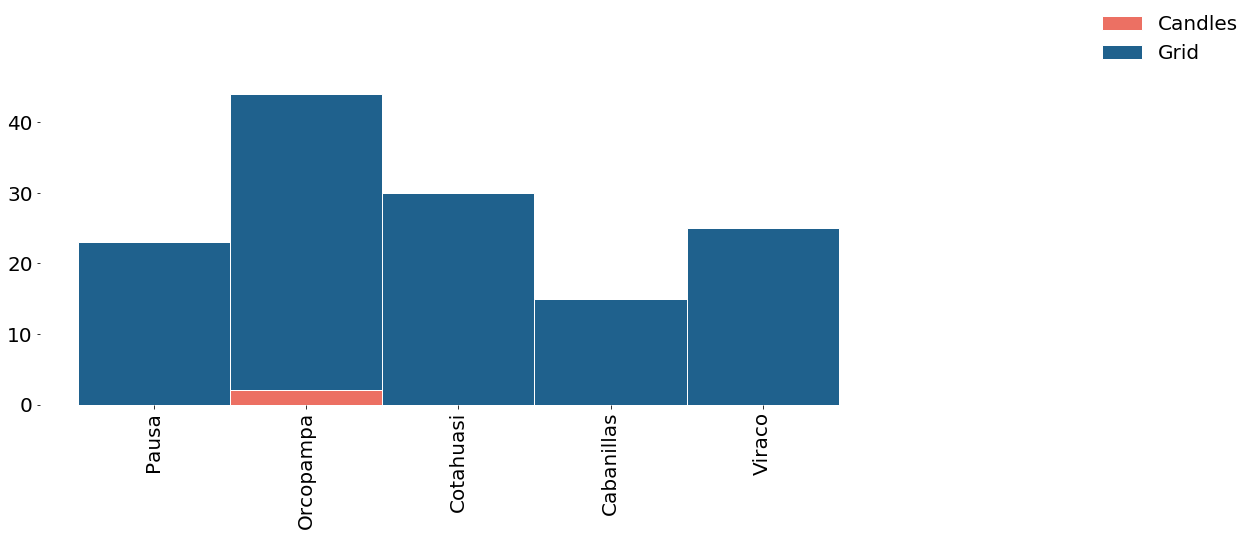

In [6]:
plt.rcParams["font.family"] = prop.get_name()
plt.rcParams.update({'font.size': 20})
mfi.electricity_sources_summary(legend=True)

### Use of Multiple Power Sources

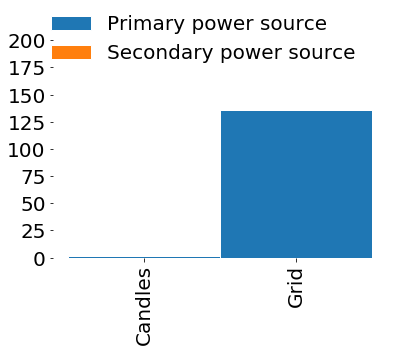

In [7]:
plt.rcParams["font.family"] = prop.get_name()
plt.rcParams.update({'font.size': 20})
collection_overview = odk.overview(mfi.HH,mfi)
odk.plot_electricity_sources(collection_overview,'en')

## MTF Electricity Index vs. Primary Source

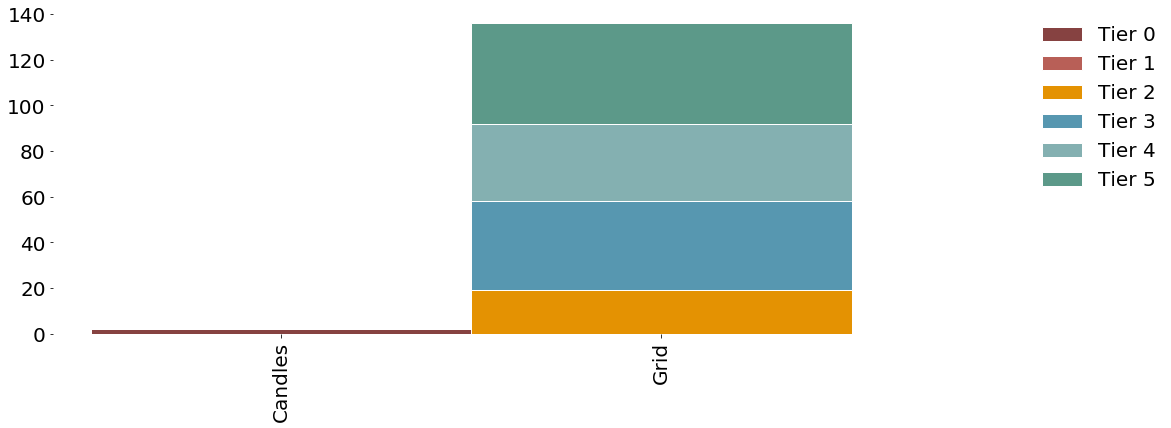

In [8]:
plt.rcParams["font.family"] = prop.get_name()
plt.rcParams.update({'font.size': 20})
mfi.stacked_tier_per_category('E_Index',hedera.keys().powerSources,
                              'primary_electricity_source',
                              hedera.names('en').powerSources,legend=True)

## Access to Cooking Solutions

### Primary Cooking Fuels

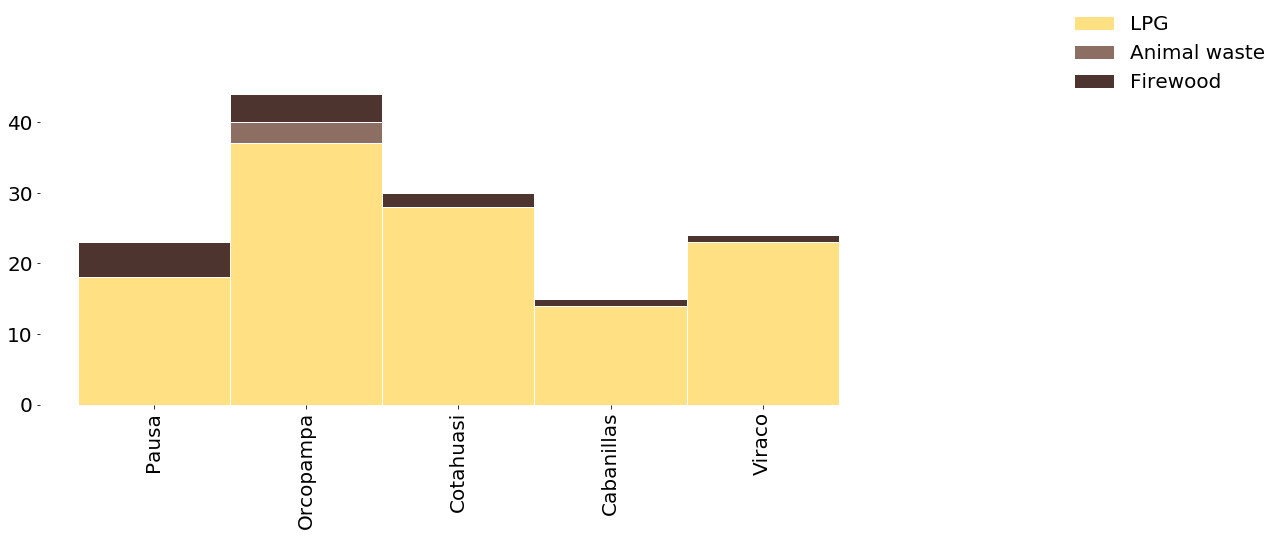

In [9]:
plt.rcParams["font.family"] = prop.get_name()
plt.rcParams.update({'font.size': 20})
mfi.cooking_fuels_summary(legend=True)

### Attributed describing access to cooking solutions

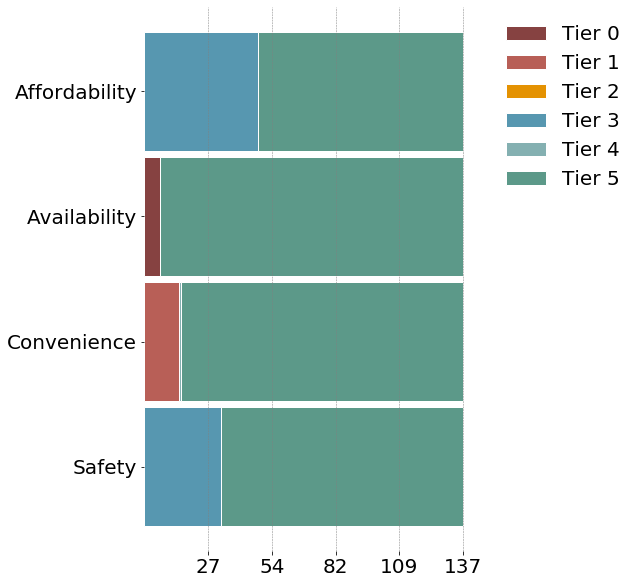

In [10]:
plt.rcParams["font.family"] = prop.get_name()
plt.rcParams.update({'font.size': 20})
mfi.tier_barh(hedera.keys().attributes_cooking[0:4],hedera.names('en').c_attributes[0:4],legend=True)

### MTF Index (Cooking solutions)
The MTF Index, for each household, is given by the minimum ranking among all attributes

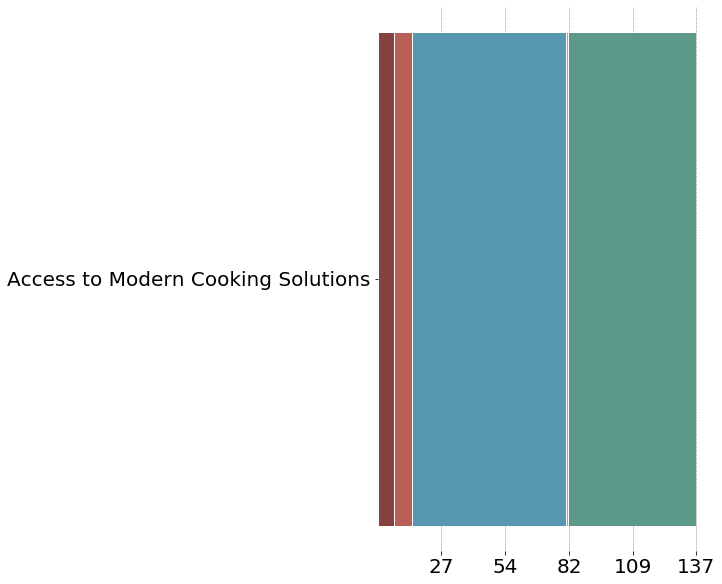

In [11]:
plt.rcParams["font.family"] = prop.get_name()
plt.rcParams.update({'font.size': 20})
mfi.tier_barh(['C_Index'],['Access to Modern Cooking Solutions'])

### MTF Index (Cooking Solutions) vs. Primary Cooking Fuel

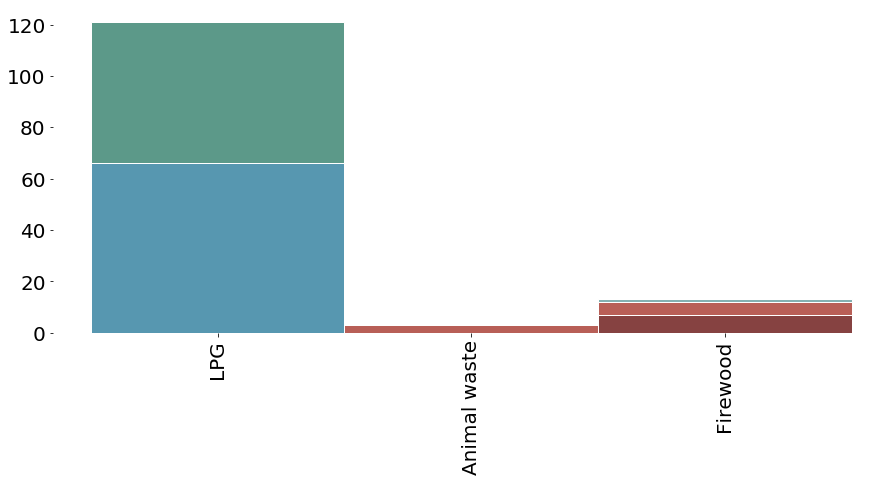

In [12]:
plt.rcParams["font.family"] = prop.get_name()
plt.rcParams.update({'font.size': 20})
mfi.stacked_tier_per_category('C_Index',hedera.keys().fuels,
                              'primary_cooking_fuel',
                              hedera.names('en').fuels)